In [17]:
from torch import Size
from rewards import SingleReward, SizeReward

import pandas as pd 
import numpy as np

from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from rdkit import Chem

In [4]:
drugs = pd.read_csv('../GraphDecomp/SmallDrug.csv',error_bad_lines=False,delimiter=';')
smiles_values = drugs['Smiles'].values
reward = SizeReward()


In [59]:
class RewardProfiler():
    def __init__(self,path):
        
        drugs = pd.read_csv(path,error_bad_lines=False,delimiter=';')
        smiles_values = drugs['Smiles']
        
        self.mols  = []
        self.bad_smiles = []
        
        for smile in smiles_values:
            try:
                mol = Chem.MolFromSmiles(smile)
                self.mols.append(mol)
            
            except:
                self.bad_smiles.append(smile)
                
        print(f'succesfuly read in {len(self.mols)} molecules, failed on {len(self.bad_smiles)}')
        
    def profile(self,reward_module: SingleReward):
        rewards = list(map(lambda x: reward_module.giveReward(x), self.mols))            
        ae, loce, scalee = skewnorm.fit(rewards)
        mean = np.mean(rewards)
        
        plt.figure()
        plt.hist(rewards, bins=[i for i in range(20)], density=True, alpha=0.6, color='g')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = skewnorm.pdf(x,ae, loce, scalee)
        plt.plot(x, p, 'k', linewidth=2)
        
        
        plt.xlabel('Reward Value')
        plt.ylabel('Probability')
        plt.title(f'Histogram of {reward_module.name()} Mean: {mean:.3f}')
                
rewardProfiler = RewardProfiler('../GraphDecomp/SmallDrug.csv')        

succesfuly read in 38597 molecules, failed on 86


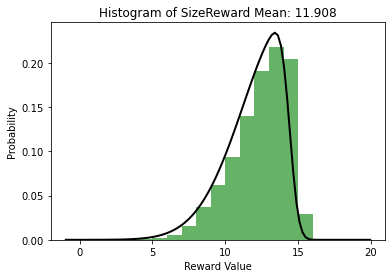

In [60]:
rewardProfiler.profile(SizeReward())
